In [1]:
import pandas as pd
import numpy as np
import feather
import datetime

import matplotlib.pyplot as plt
from matplotlib import RcParams
import seaborn as sns

energy = pd.read_feather('data/energy.ftr')

sns.set_style = "seaborn-whitegrid"

color = "#333"

sns.set(
    rc={
        "font.style": "normal",
        "axes.facecolor": "white",
        "grid.color": ".8",
        "grid.linestyle": "-",
        "figure.facecolor": "white",
        "axes.titlesize": 16,
        "text.color": color,
        "xtick.color": color,
        "ytick.color": color,
        "axes.labelcolor": color,
        "axes.titlecolor": color,
        "axes.titlepad": 18,
        "axes.grid": True,
        "axes.labelsize": 12,
        "xtick.labelsize": 10,
        "font.size": 12,
        "ytick.labelsize": 10,
        "legend.title_fontsize": 10,
    }
)

In [3]:
energy.drop(columns=['pompage'], inplace=True)

In [13]:
consommation = energy[['region', 'date_heure', 'consommation']]
consommation = consommation[ (consommation['date_heure'].dt.year > 2012) & (consommation['date_heure'].dt.year < 2021) ]

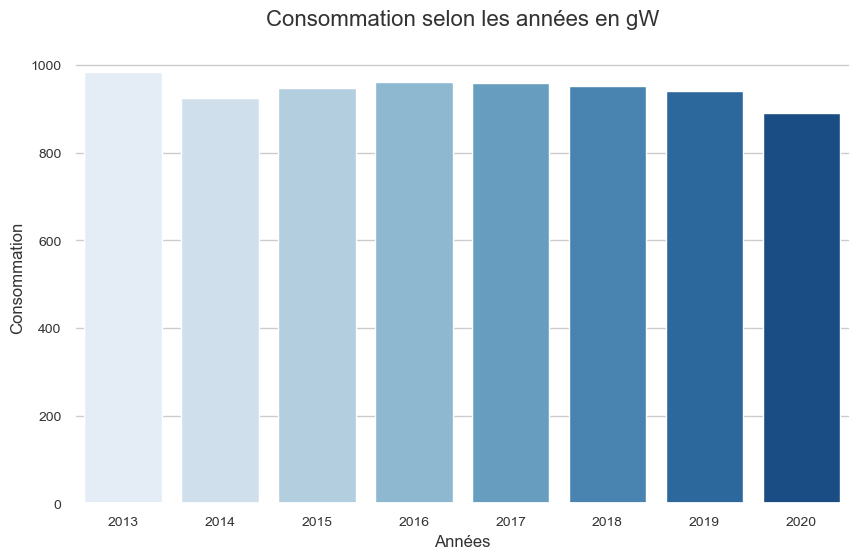

In [24]:
conso_by_year = consommation.groupby(pd.Grouper(key='date_heure', freq='Y'))['consommation'].sum().reset_index()

conso_by_year['consommation'] = conso_by_year['consommation'] / 1000

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.barplot(x=conso_by_year['date_heure'].dt.year, y='consommation', data=conso_by_year, ax=ax, palette='Blues')
ax.set_title('Consommation selon les années en gW')
ax.set_xlabel('Années')
ax.set_ylabel('Consommation')
plt.show()

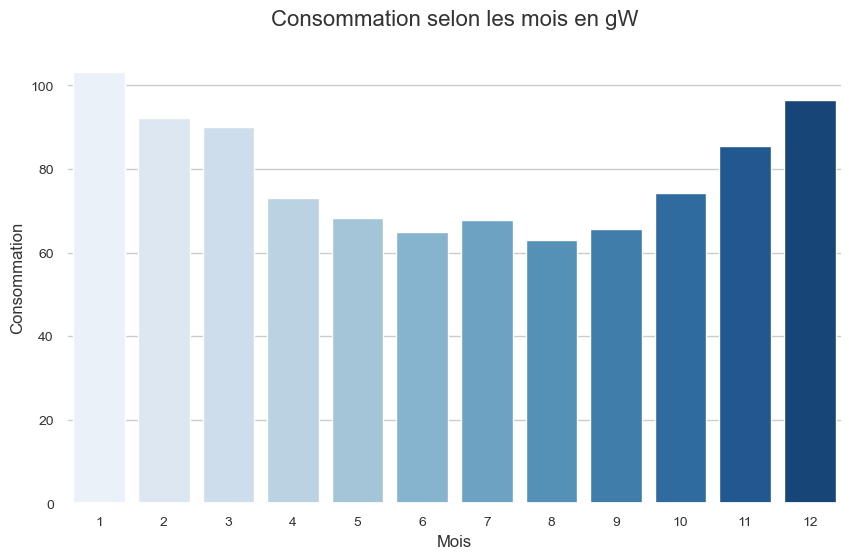

In [26]:
conso_by_month = consommation.groupby(pd.Grouper(key='date_heure', freq='M'))['consommation'].sum().reset_index()

conso_by_month['consommation'] = conso_by_month['consommation'] / 1000

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.barplot(x=conso_by_month['date_heure'].dt.month, y='consommation', data=conso_by_month, ax=ax, palette='Blues', ci=False)
ax.set_title('Consommation selon les mois en gW')
ax.set_xlabel('Mois')
ax.set_ylabel('Consommation')
plt.show()

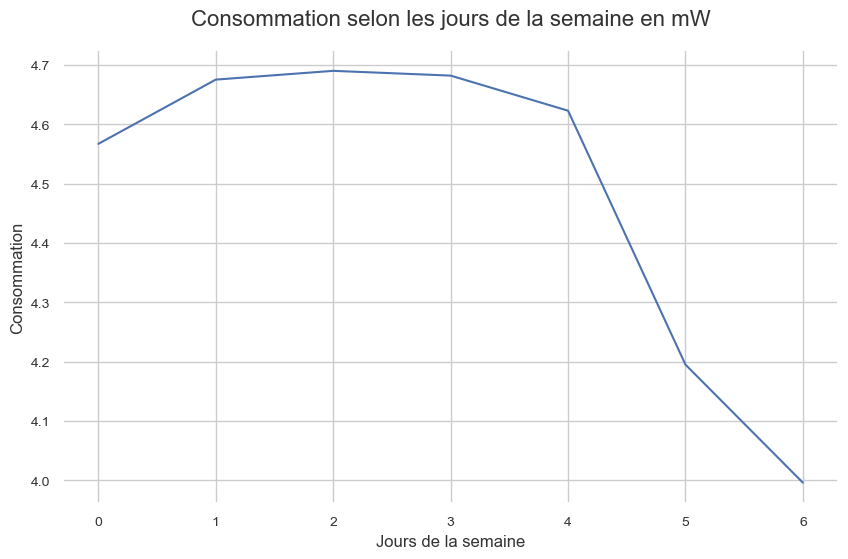

In [44]:
conso_by_dow = consommation.copy()
conso_by_dow['dow'] = conso_by_dow['date_heure'].dt.dayofweek
conso_by_dow['dn'] = conso_by_dow['date_heure'].dt.day_name()
conso_by_dow = conso_by_dow.groupby('dow')['consommation'].mean().reset_index()

conso_by_dow['consommation'] = conso_by_dow['consommation']

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.lineplot(x='dow', y='consommation', data=conso_by_dow, ax=ax)
ax.set_title('Consommation selon les jours de la semaine en mW')
ax.set_xlabel('Jours de la semaine')
ax.set_ylabel('Consommation')
plt.show()